# Lämpötilatutkimus Pythonilla koodaamalla

Tutkitaan Sodankylän päivittäisiä lämpötilan keskiarvoja viimeisen 70 vuoden ajalta.

Ladataan ensin ohjelman vaatimat koodikirjastot ja ladataan sitten lämpötilat taulukkoon.

In [0]:
# Olen koodisolu! Risuaidalla merkattu rivi on kommentti, joka tekee koodista ihmiselle luettavampaa.
# Aja tämä solu ensin, jotta python tietää mitä sillä ollaan tekemässä (eli haetaan sopivat paketit).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

%matplotlib inline

In [0]:
PKAURL = 'https://raw.githubusercontent.com/PKAsci/jupyter-test/master/'


# Luetaan Sodankylän 1950-2019 lämpötiladata
dataURL = PKAURL+'sodankyla_paivalampotila_1950-2019.csv'
dataset = pd.read_csv(dataURL)
lämpötiladata_sod = dataset

# Luetaan Siikajoen 1959-2019 lämpötiladata
dataURL = PKAURL+'siikajoki_paivalampotila_1959-2019.csv'
dataset = pd.read_csv(dataURL)
lämpötiladata_siik = dataset

# Luetaan Paraisen 1959-2019 lämpötiladata
dataURL = PKAURL+'parainen_paivalampotila_1959-2019.csv'
dataset = pd.read_csv(dataURL)
lämpötiladata_par = dataset

Katsotaan sitten mitä taulukossa on.

```.head()``` -loppupääte listaa näkyville taulukon ensimmäiset rivit.

```plt.``` kirjaston komennoilla datasta saa piirrettyä erilaisia diagrammeja 





In [0]:
lämpötiladata_sod.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC)
0,1950,1,1,00:00,UTC,-23.2
1,1950,1,2,00:00,UTC,-32.9
2,1950,1,3,00:00,UTC,-28.6
3,1950,1,4,00:00,UTC,-26.4
4,1950,1,5,00:00,UTC,-24.6


In [0]:
lämpötiladata_siik.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC)
0,1959,1,1,00:00,UTC,-7.3
1,1959,1,2,00:00,UTC,-7.2
2,1959,1,3,00:00,UTC,-9.1
3,1959,1,4,00:00,UTC,-2.9
4,1959,1,5,00:00,UTC,-1.3


In [0]:
lämpötiladata_par.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC)
0,1959,1,1,00:00,UTC,2.3
1,1959,1,2,00:00,UTC,1.7
2,1959,1,3,00:00,UTC,2.7
3,1959,1,4,00:00,UTC,2.5
4,1959,1,5,00:00,UTC,0.2


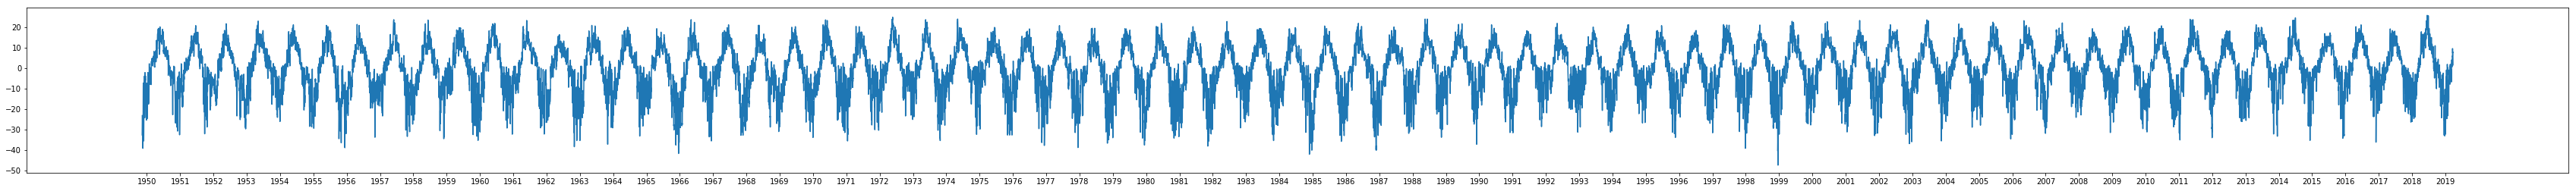

In [6]:
# Piirretään Sodankylän datasta viivadiagrammi
Npoints = len(lämpötiladata_sod['Vuosi'])
tickArray = lämpötiladata_sod['Vuosi'][50:Npoints:365]
plt.figure(figsize=(60, 4))
plt.plot(lämpötiladata_sod['Ilman lämpötila (degC)'])
plt.xticks(tickArray.index,tickArray)
plt.show()

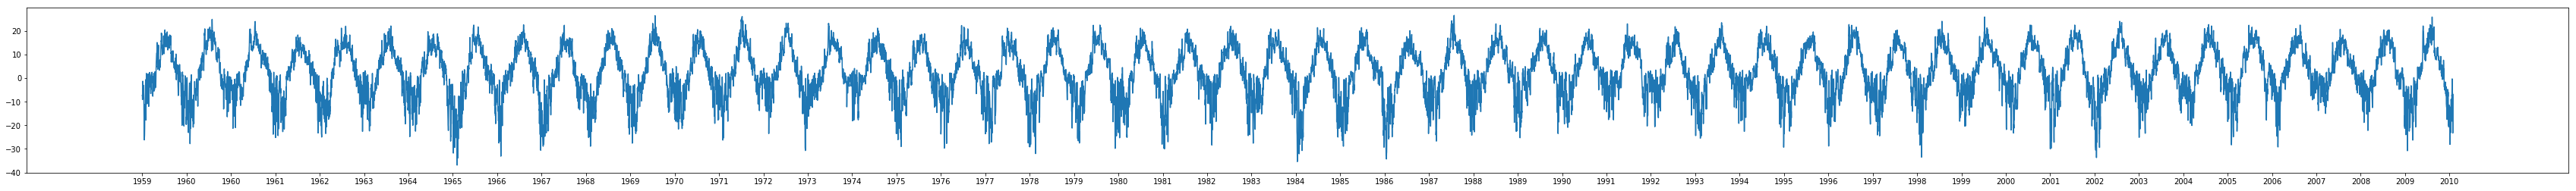

In [0]:
# Piirretään Siikajoen datasta viivadiagrammi
Npoints = len(lämpötiladata_siik['Vuosi'])
tickArray = lämpötiladata_siik['Vuosi'][0:Npoints:365]
plt.figure(figsize=(60, 4))
plt.plot(lämpötiladata_siik['Ilman lämpötila (degC)'])
plt.xticks(tickArray.index,tickArray)
plt.show()

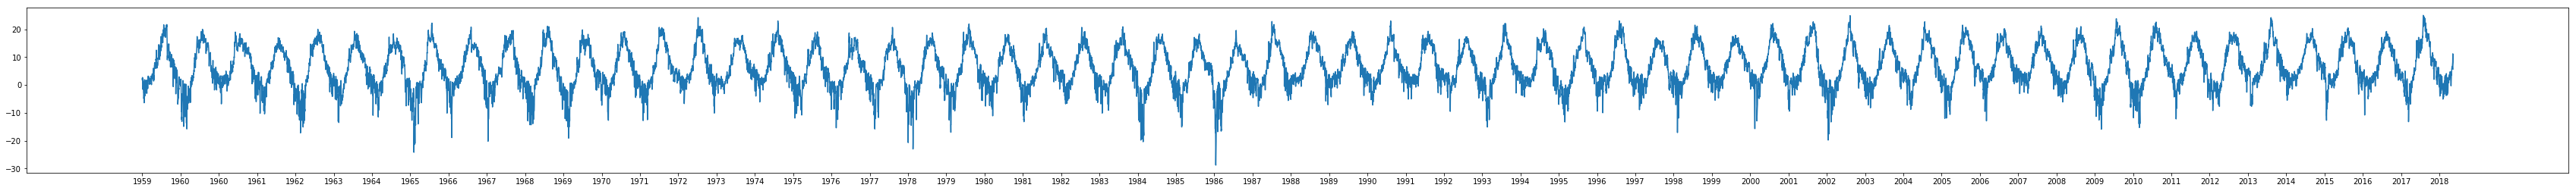

In [0]:
# Piirretään Paraisten datasta viivadiagrammi
Npoints = len(lämpötiladata_par['Vuosi'])
tickArray = lämpötiladata_par['Vuosi'][0:Npoints:365]
plt.figure(figsize=(60, 4))
plt.plot(lämpötiladata_par['Ilman lämpötila (degC)'])
plt.xticks(tickArray.index,tickArray)
plt.show()

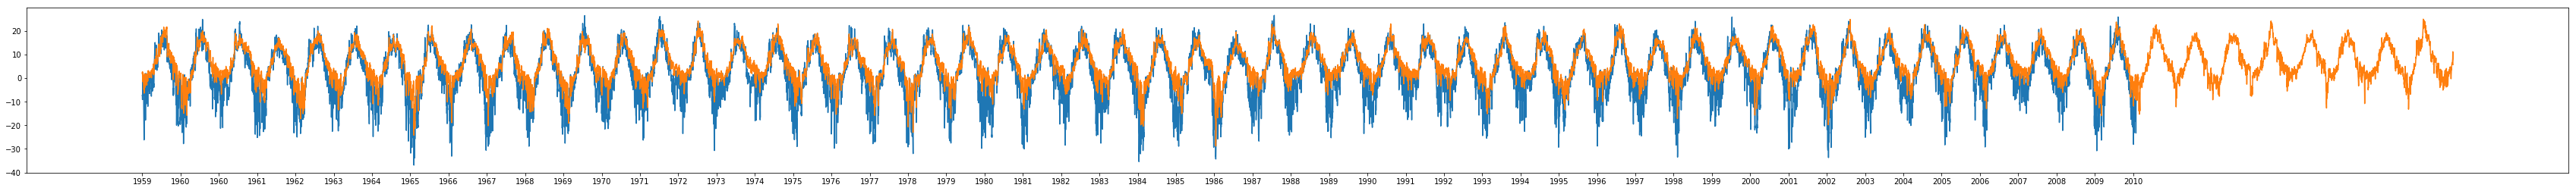

In [0]:
# Piirretään kaikki data samaan viivadiagrammiin
Npoints = len(lämpötiladata_siik['Vuosi'])
tickArray = lämpötiladata_siik['Vuosi'][0:Npoints:365]
plt.figure(figsize=(60, 4))
plt.plot(lämpötiladata_siik['Ilman lämpötila (degC)'])
plt.plot(lämpötiladata_par['Ilman lämpötila (degC)'])
plt.xticks(tickArray.index,tickArray)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


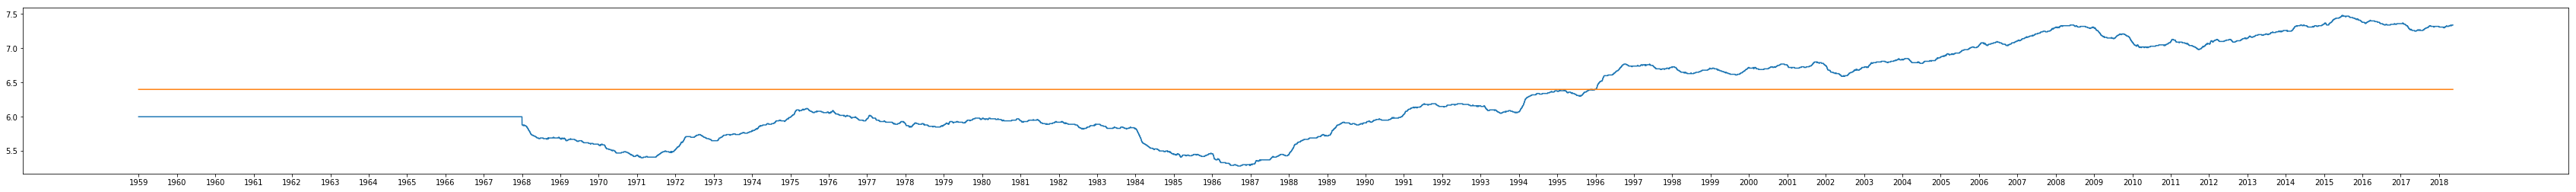

In [0]:
# 30 päivän liukukeskiarvojen laskeminen

mylist = lämpötiladata_par['Ilman lämpötila (degC)']
#mylist.replace('NaN',0)
s=np.isnan(mylist)
mylist[s]=0

N = 30
cumsum, moving_aves = [0], [6]*N

for i, x in enumerate(mylist, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_ave = round(moving_ave, 2)
        moving_aves.append(moving_ave)

# Piirretään liukukeskiarvo ja paraisen data samaan viivadiagrammiin
Npoints = len(lämpötiladata_par['Vuosi'])
tickArray = lämpötiladata_par['Vuosi'][0:Npoints:365]
plt.figure(figsize=(60, 4))
#plt.plot(lämpötiladata_par['Ilman lämpötila (degC)'], alpha=0.3)
plt.plot(moving_aves)
plt.plot(means_par)
plt.xticks(tickArray.index,tickArray)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


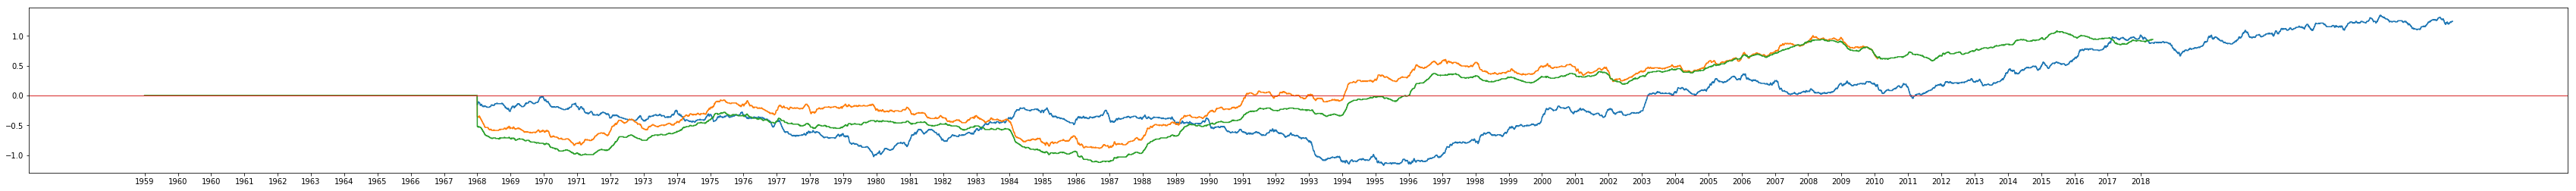

In [0]:
# 10 vuoden liukukeskiarvojen laskeminen ja normittaminen

mydata = [lämpötiladata_sod, lämpötiladata_siik, lämpötiladata_par]
dN = len(mydata)
moving_ave_data = []
plt.figure(figsize=(60, 4))

for k in range(0,dN):
  moving_ave_data.append([])
  mylist = mydata[k]['Ilman lämpötila (degC)']
  #mylist.replace('NaN',0)
  s=np.isnan(mylist)
  mylist[s]=0

  N = 3650
  cumsum, moving_aves = [0], [0]*(N-1)

  for i, x in enumerate(mylist, 1):
      cumsum.append(cumsum[i-1] + x)
      if i>=N:
          moving_ave = (cumsum[i] - cumsum[i-N])/N
          #can do stuff with moving_ave here
          moving_ave = round(moving_ave, 2)
          moving_aves.append(moving_ave)

  # Koko datan keskiarvon laskeminen

  meanT = cumsum[len(cumsum)-1]/len(cumsum)

  for i in range(0,len(moving_aves)):
    moving_aves[i] = moving_aves[i]-meanT

  # Datan alun tasoittaminen
  for i in range(0,N):
    moving_aves[i] = 0


  # Piirretään liukukeskiarvo ja paraisen data samaan viivadiagrammiin
  Npoints = len(mydata[k]['Vuosi'])
  tickArray = mydata[k]['Vuosi'][0:Npoints:365]
  #plt.plot(lämpötiladata_par['Ilman lämpötila (degC)'], alpha=0.3)
  plt.plot(moving_aves)
  
  # Keskiarvodatan tallennus muuttujaan
  
  moving_ave_data[k] = moving_aves
  
plt.xticks(tickArray.index,tickArray)
plt.axhline(linewidth=1, color='#d62728')
plt.show()

In [0]:
len(mydata)

3

In [0]:
len(cumsum),Npoints

(22032, 22031)

In [0]:
cumsum[14600], len(cumsum),len(moving_aves), #moving_aves, mydata[0]['Vuosi']

(87417.50000000001, 22032, 22032)

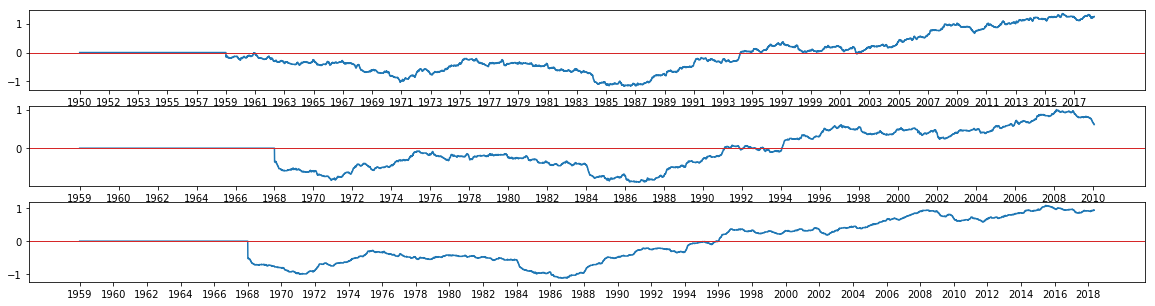

In [0]:
# Subplot -kokeilu (Nx1) N kpl päällekkäistä koordinaatistoa

N = 3;
plt.figure(figsize = (20,5))

 
inds = []
for k in range(0,N):
  inds.append([])
  for i in range(0,len(moving_ave_data[k])):
    inds[k].append(i)

  plt.subplot(3, 1, k+1)
  plt.plot(inds[k],moving_ave_data[k])
  
  # Tehdään x-akselille vuosiluvut
  Npoints = len(mydata[k]['Vuosi'])
  tickArray = mydata[k]['Vuosi'][0:Npoints:730]
  plt.xticks(tickArray.index,tickArray)
  plt.axhline(linewidth=1, color='#d62728')
plt.show()

In [0]:
k = [0]
k

[0]